In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

In [2]:
avocado = pd.read_csv("dataset/avocado.csv", index_col=0, parse_dates=["Date"])

In [3]:
avocado.sort_values("Date")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


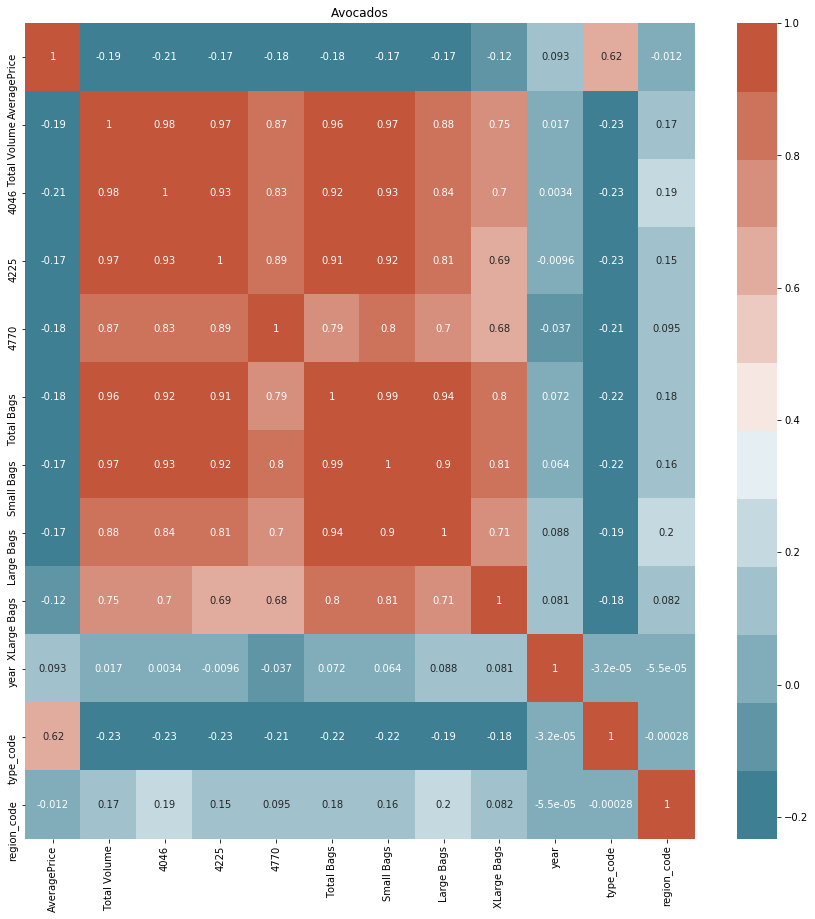

In [17]:
plt.figure(figsize=(15, 15))
df_corr = avocado.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Avocados")
plt.show()

In [15]:
label_encoder = LabelEncoder()
avocado["type_code"] = label_encoder.fit_transform(avocado["type"])
avocado["region_code"] = label_encoder.fit_transform(avocado["region"])
avocado = avocado.drop(["region", "type"],axis= 1)

In [16]:
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_code,region_code
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,1,53
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,53
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,53
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,53


In [18]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'type_code', 'region_code'],
      dtype='object')

In [20]:
X = avocado[['Total Volume', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','type_code', 'region_code']]
y = avocado[["AveragePrice"]].values

In [21]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [23]:
Model = []
RMSE = []
MAE = []
MSE = []
R_Square = []
adj_rsquared = []
CV = []

In [24]:
names = ["Linear Regression", "Ridge Regression", "Lasso Regression",
         "Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor",
         "Adaboost Regressor", "BaggingRegressor", "ExtraTreesRegressor","XGBRegressor", "XGBRFRegressor"]
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(), BaggingRegressor(), ExtraTreesRegressor(),XGBRegressor(), XGBRFRegressor()]

In [25]:
def evaluate(true, predicted, variable_of_model):
    MAE.append(metrics.mean_absolute_error(true, predicted))
    MSE.append(metrics.mean_squared_error(true, predicted))
    RMSE.append(np.sqrt(metrics.mean_squared_error(true, predicted)))
    R_Square.append(metrics.r2_score(true, predicted))
    n= X_test.shape[0]
    p= X_test.shape[1] - 1
    adj_rsquared.append(1 - (1 - R_Square[-1]) * ((n - 1)/(n-p-1)))
    cv_accuracies = cross_val_score(estimator = variable_of_model, X = X_train, y = y_train.ravel(), cv = 5,verbose = 1)
    CV.append(cv_accuracies.mean())

In [26]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    n= X_test.shape[0]
    p= X_test.shape[1] - 1
    adj_rsquared = 1 - (1 - r2_square) * ((n - 1)/(n-p-1))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Square", r2_square)
    print("adj R Square", adj_rsquared)

In [27]:
def pred_vis(name, y_test_vis, y_pred_vis):
    if y_test_vis.shape[0] > 200:
        y_test_vis = y_test_vis[:200]
        y_pred_vis = y_pred_vis[:200]
        
    y_test_m_vis = y_test_vis
    plt.figure(figsize=(12,5))
    plt.title("{} Prediction" .format(name))
    plt.plot(y_test_m_vis, c="steelblue", alpha=1)
    plt.plot(y_pred_vis, c="darkorange", alpha=2)
    legend_list = ["y_test", "y_pred"]
    plt.xlabel("Var")
    plt.ylabel("Output")
    plt.legend(legend_list, loc=1, fontsize="10")
    plt.grid(True)
    plt.show()

In [28]:
def fit_and_predict(name, model):
    variable_of_model = model
    variable_of_model.fit(X_train, y_train.ravel())
    pred = variable_of_model.predict(X_test)
    pred_vis(name, y_test, pred)
    evaluate(y_test, pred, variable_of_model)

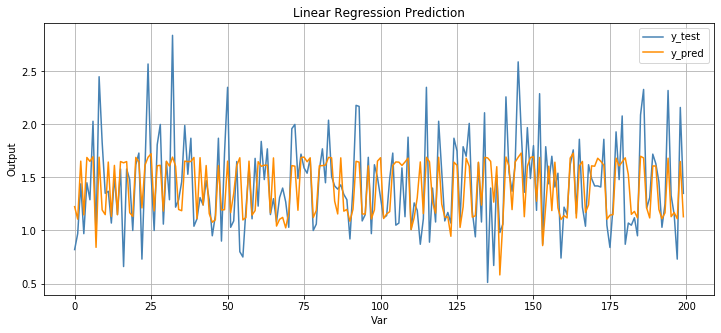

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


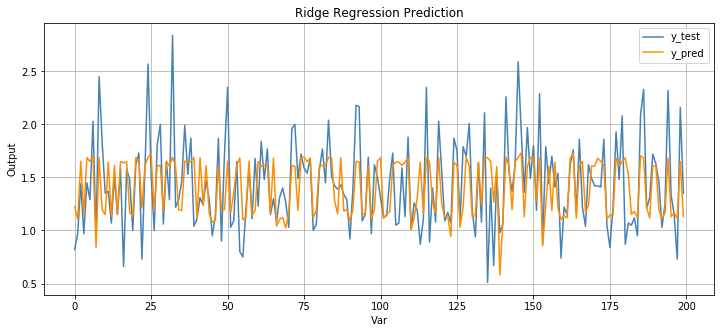

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


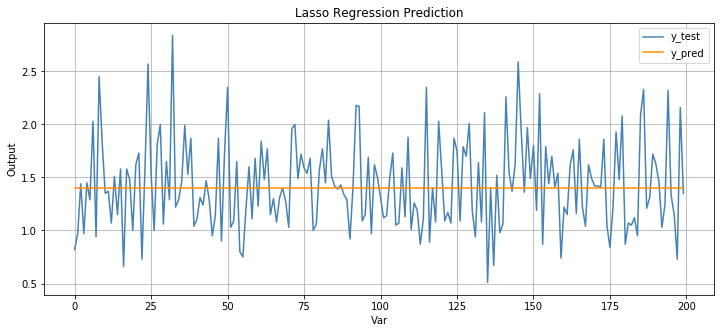

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


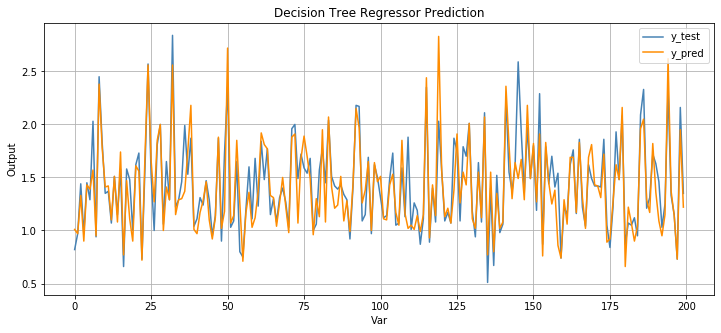

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


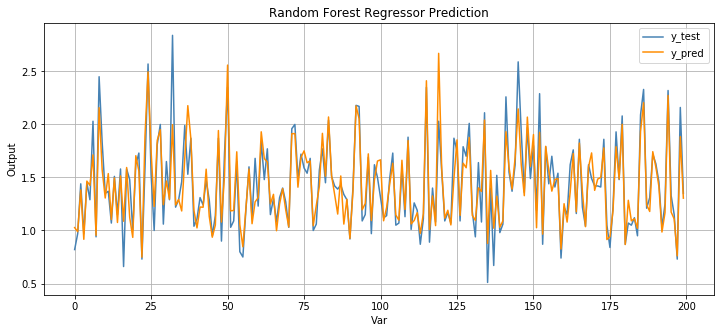

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.1s finished


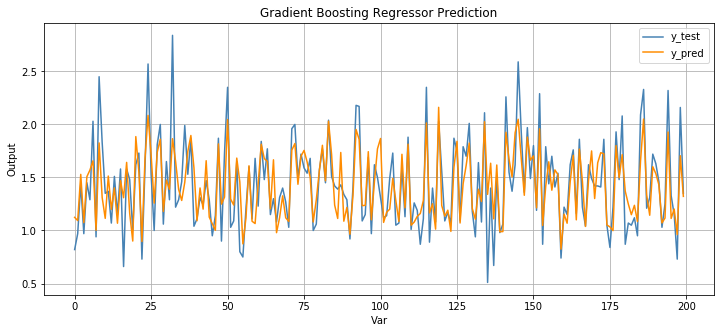

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.0s finished


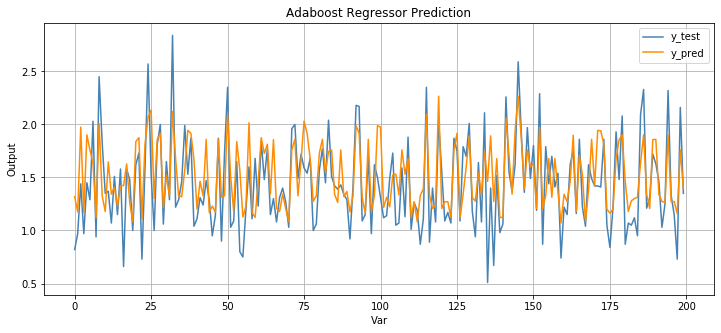

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


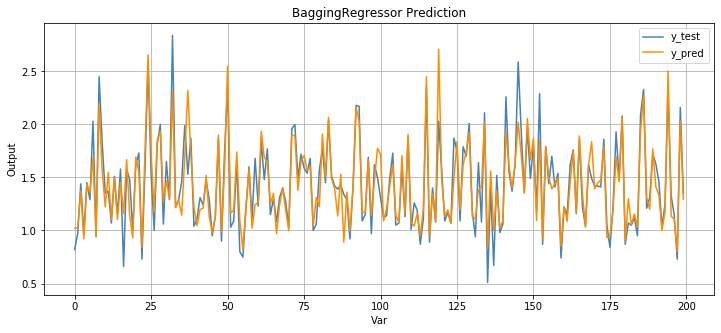

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished


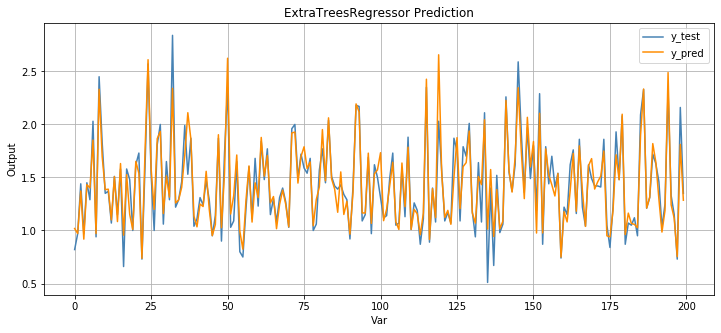

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.6s finished


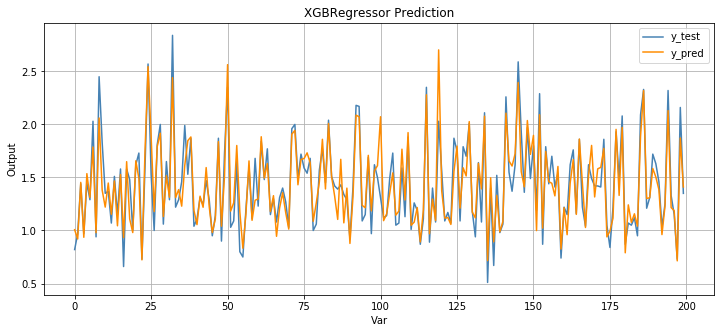

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


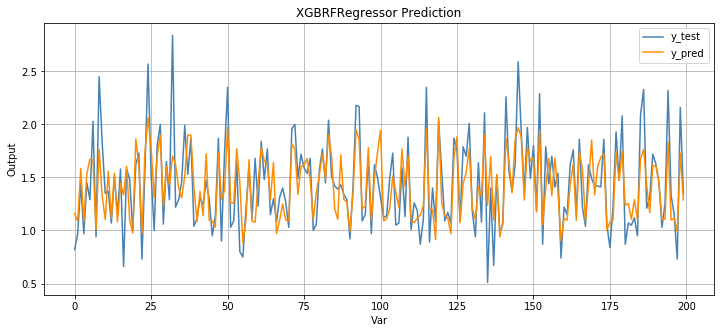

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished


In [29]:
for name, model in zip(names, models):
    fit_and_predict(name, model)

In [30]:
evaluation_dataframe = pd.DataFrame({"Model": names,
                                     "MAE": MAE,
                                     "MSE": MSE,
                                     "RMSE": RMSE,
                                     "R Squared": R_Square,
                                     "adj R Squared": adj_rsquared,
                                     "Cross Validation": CV})

In [31]:
evaluation_dataframe = evaluation_dataframe.sort_values("adj R Squared")

In [32]:
evaluation_dataframe

,Model,MAE,MSE,RMSE,R Squared,adj R Squared,Cross Validation
2,Lasso Regression,0.322499,0.160700,0.400874,-0.000195,-0.002668,-0.000588
1,Ridge Regression,0.240980,0.097545,0.312321,0.392885,0.391384,0.409082
0,Linear Regression,0.240937,0.097520,0.312282,0.393038,0.391537,0.408820
6,Adaboost Regressor,0.239808,0.086955,0.294881,0.458794,0.457456,0.482756
10,XGBRFRegressor,0.186020,0.060266,0.245491,0.624906,0.623979,0.637099
5,Gradient Boosting Regressor,0.175075,0.054215,0.232842,0.662565,0.661730,0.673832
3,Decision Tree Regressor,0.145353,0.050541,0.224814,0.685433,0.684655,0.665831
7,BaggingRegressor,0.116658,0.027917,0.167084,0.826245,0.825816,0.815921
9,XGBRegressor,0.120014,0.027353,0.165389,0.829753,0.829332,0.816474
4,Random Forest Regressor,0.110266,0.024638,0.156964,0.846656,0.846277,0.834849
